In [1]:
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Label
import scienceplots
import numpy as np

import warnings

warnings.filterwarnings('ignore', category=RuntimeWarning,)


# Exercise 6: **Fresnel Coefficients**

## 6.1 *Visualize and explain the behavior of the dielectric constant of water (293.15K) in the visible and in the microwave domain as a function of frequency.* 


Definitions:
Using $\mathrm{c} = \nu \cdot \lambda$
* VIS: $400\cdot 10^{-9}$ m to $750\cdot 10^{-9}$ m $\Rightarrow$ 428 GHz to 749 GHz
* MW: $1\cdot 10^{-3}$ m to $1$ m $\Rightarrow$ 300 MHz to 300 GHz

The *Debye function*, describing the complex relative permittivity, is defined as:

$\epsilon_r = \epsilon_{\infty} + \dfrac{\epsilon_s - \epsilon_{\infty}}{1 + i\dfrac{\nu}{\nu_0}}$

with $\epsilon_{\infty}$ being the high-frequency permittivity, $\epsilon_s$ the static permittivity, $\nu_0$ the relax0ation frequency and $\nu$ the angular frequency.

From the lecture it is known:

* $\epsilon_{\infty}\left(T = 293.15K \right) = 4.9$
* $\epsilon_s\left(T = 293.15K \right) = 88.3$
* $\nu_0\left(T = 293.15K \right) = 17\cdot 10^{12}$ Hz



In [2]:
SPEED_OF_LIGHT = 299792458.0 # m/s

def nu_from_lambda(la: float) -> float:
    """
    Return the frequency (Hz) of a given wavelength (m).

    Parameters
    ----------

    la : float
        Wavelength (m)

    Returns
    -------

    nu : float
        Frequency (Hz)
    """

    return SPEED_OF_LIGHT / la

print(f'A wavelength range from {400e-9} m to {750e-9} m corresponds to a frequency range from {nu_from_lambda(400e-9)} Hz to {nu_from_lambda(700e-9)} Hz')
print(f'A wavelength range from {1e-3} m to {1} m corresponds to a frequency range from {nu_from_lambda(1e-3)} Hz to {nu_from_lambda(1)} Hz')



EPS_INF_WATER_20 = 4.9
EPS_S_WATER_20 = 80
NU_0_WATER_20 = 17e12

A wavelength range from 4e-07 m to 7.5e-07 m corresponds to a frequency range from 749481145000000.0 Hz to 428274940000000.0 Hz
A wavelength range from 0.001 m to 1 m corresponds to a frequency range from 299792458000.0 Hz to 299792458.0 Hz


In [3]:
def debye_function(eps_inf: float, eps_s: float, nu_0: float, nu: float) -> complex:
    """
    Return the Debye function for a given set of parameters.

    Parameters
    ----------

    eps_inf : float
        High frequency dielectric constant

    eps_s : float
        Static dielectric constant

    nu_0 : float
        Characteristic frequency (Hz)

    nu : float
        Frequency (Hz)

    Returns
    -------

    eps : complex
        Dielectric constant
    """


    return eps_inf + ((eps_s - eps_inf) / (1 + (1j * nu / nu_0)))

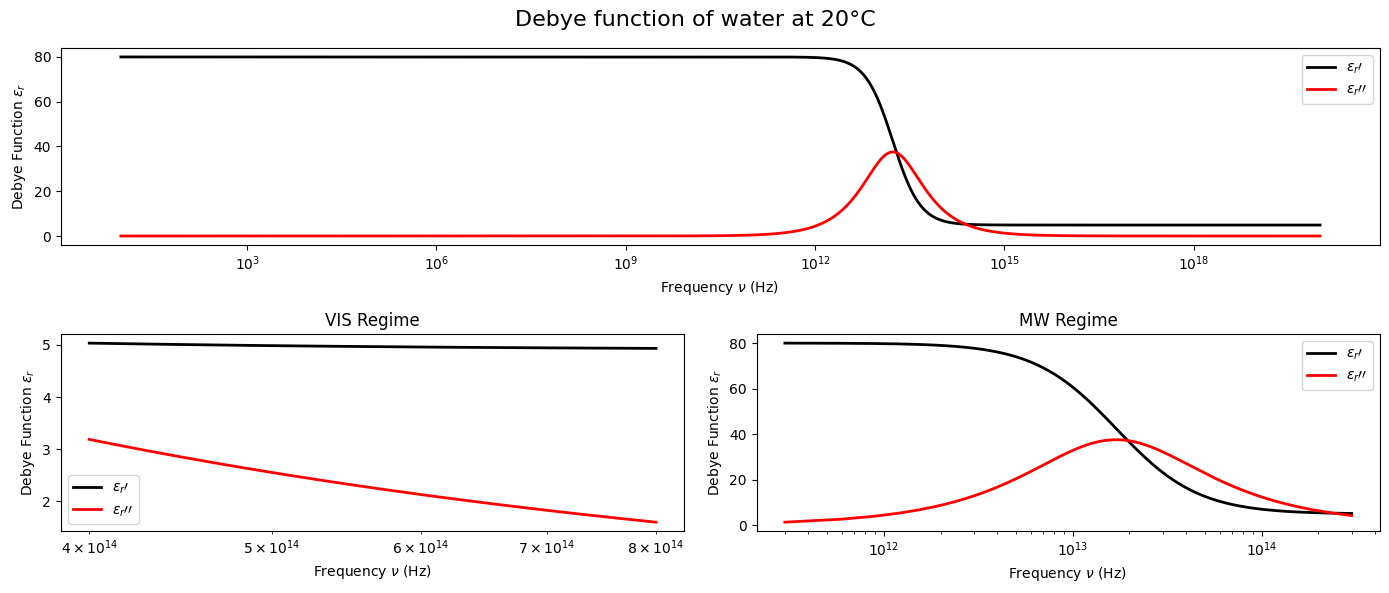

In [8]:
freqs = np.logspace(1, 20, 10000)

# with plt.style.context('science'):
fig = plt.figure(figsize=(14, 6))
fig.suptitle('Debye function of water at 20°C', fontsize=16)

ax = fig.add_subplot(211)
ax.plot(freqs, np.real(debye_function(eps_inf=EPS_INF_WATER_20, eps_s=EPS_S_WATER_20, nu_0=NU_0_WATER_20, nu=freqs)), color = 'black', linewidth = 2, label=r'$\epsilon_r\prime$')
ax.plot(freqs, -np.imag(debye_function(eps_inf=EPS_INF_WATER_20, eps_s=EPS_S_WATER_20, nu_0=NU_0_WATER_20, nu=freqs)), color = 'red', linewidth = 2, label=r'$\epsilon_r\prime\prime$')
ax.set_xlabel(r'Frequency $\nu$ (Hz) ')
ax.set_ylabel(r'Debye Function $\epsilon_r$')
ax.legend()

ax.set_xscale('log')

ax0 = fig.add_subplot(223)
ax0.set_title('VIS Regime')
freqs = np.linspace(400e12, 800e12, 1000)
ax0.plot(freqs, np.real(debye_function(eps_inf=EPS_INF_WATER_20, eps_s=EPS_S_WATER_20, nu_0=NU_0_WATER_20, nu=freqs)), color = 'black', linewidth = 2, label=r'$\epsilon_r\prime$')
ax0.plot(freqs, -np.imag(debye_function(eps_inf=EPS_INF_WATER_20, eps_s=EPS_S_WATER_20, nu_0=NU_0_WATER_20, nu=freqs)), color = 'red', linewidth = 2, label=r'$\epsilon_r\prime\prime$')
ax0.set_xlabel(r'Frequency $\nu$ (Hz) ')
ax0.set_ylabel(r'Debye Function $\epsilon_r$')
ax0.legend()
ax0.set_xscale('log')

ax1 = fig.add_subplot(224)
freqs = np.linspace(0.3e12, 300e12, 1000)
ax1.set_title('MW Regime')
ax1.plot(freqs, np.real(debye_function(eps_inf=EPS_INF_WATER_20, eps_s=EPS_S_WATER_20, nu_0=NU_0_WATER_20, nu=freqs)), color = 'black', linewidth = 2, label=r'$\epsilon_r\prime$')
ax1.plot(freqs, -np.imag(debye_function(eps_inf=EPS_INF_WATER_20, eps_s=EPS_S_WATER_20, nu_0=NU_0_WATER_20, nu=freqs)), color = 'red', linewidth = 2, label=r'$\epsilon_r\prime\prime$')
ax1.set_xlabel(r'Frequency $\nu$ (Hz) ')
ax1.set_ylabel(r'Debye Function $\epsilon_r$')
ax1.legend()
ax1.set_xscale('log')
plt.tight_layout()
plt.show()

## 6.2 *Try to answer the following questions:*
* *How does the reﬂectivity of water (293.15K) for horizontally and vertically polarized waves behave as a function of the incidence angle and depending on the frequency? The water can be considered lossless.*
* *What is the Brewster angle? Also visualize it.*

While *Snell's law* describes the relation between the angle of incidence and the angle of refraction, it does not describe the polarization of the wave. On the other hand, the *Fresnel equations* predict the relative fraction of incident radiation that is reflected or refracted at an interface. The equations assume the interface between the media is flat and that the media are homogeneous. 

The *Fresnel equations* are:

$R_s = \left| \dfrac{n_1 \cdot \cos\left(\theta_1\right) - n_2 \cdot \cos\left(\theta_2\right)}{n_1 \cdot \cos\left(\theta_1\right) + n_2 \cdot \cos\left(\theta_2\right)} \right|^2$

$R_p = \left| \dfrac{n_1 \cdot \cos\left(\theta_2\right) - n_2 \cdot \cos\left(\theta_1\right)}{n_1 \cdot \cos\left(\theta_2\right) + n_2 \cdot \cos\left(\theta_1\right)} \right|^2$

$T_s = 1 - R_s$

$T_p = 1 - R_p$

The angle of incidence $\theta_1$ and the angle of refraction $\theta_2$ are related by *Snell's law*:

$\dfrac{\sin\left(\theta_1\right)}{\sin\left(\theta_2\right)} = \dfrac{n_2}{n_1}$

with $n_1$ and $n_2$ being the refractive indices of the two media.

Thus, $\theta_2$ can be expressed as function of $\theta_1$ and using the the trigonometric relation $\cos\left(x\right)^2 + \sin\left(x\right)^2 = 1$ can substituted in the *Fresnel equations*. Last, the refractive index is given by the complex relative permittivity $\epsilon_r$, which is a function of the frequency $\nu$ and can be expressed using the debye function:

$n = \sqrt{\epsilon_r} = \sqrt{\epsilon_{\infty} + \dfrac{\epsilon_s - \epsilon_{\infty}}{1 + i\dfrac{\nu}{\nu_0}}}$

Thus, the *Fresnel equations* can be expressed as function of the frequency $\nu_i$ and the angle of incidence $\theta_1$:


$R_s\left(\theta_1, \nu_1\right) = \left| \dfrac{\sqrt{\epsilon_{\infty,1} + \dfrac{\epsilon_{s,1} - \epsilon_{\infty,1}}{1 + i \dfrac{\nu_1}{\nu_{0,1}}}} \cdot \cos\left(\theta_1\right) - \sqrt{\epsilon_{\infty,2} + \dfrac{\epsilon_{s,2} - \epsilon_{\infty,2}}{1 + i \dfrac{\nu_2}{\nu_{0,2}}}} \cdot \sqrt{1 - \left(\dfrac{\sqrt{\epsilon_{\infty,1} + \dfrac{\epsilon_{s,1} - \epsilon_{\infty,1}}{1 + i \dfrac{\nu_1}{\nu_{0,1}}}}}{\sqrt{\epsilon_{\infty,2} + \dfrac{\epsilon_{s,2} - \epsilon_{\infty,2}}{1 + i \dfrac{\nu_2}{\nu_{0,2}}}}}\right)^2 \sin^2\left(\theta_1\right)}}{\sqrt{\epsilon_{\infty,1} + \dfrac{\epsilon_{s,1} - \epsilon_{\infty,1}}{1 + i \dfrac{\nu_1}{\nu_{0,1}}}} \cdot \cos\left(\theta_1\right) + \sqrt{\epsilon_{\infty,2} + \dfrac{\epsilon_{s,2} - \epsilon_{\infty,2}}{1 + i \dfrac{\nu_2}{\nu_{0,2}}}} \cdot \sqrt{1 - \left(\dfrac{\sqrt{\epsilon_{\infty,1} + \dfrac{\epsilon_{s,1} - \epsilon_{\infty,1}}{1 + i \dfrac{\nu_1}{\nu_{0,1}}}}}{\sqrt{\epsilon_{\infty,2} + \dfrac{\epsilon_{s,2} - \epsilon_{\infty,2}}{1 + i \dfrac{\nu_2}{\nu_{0,2}}}}}\right)^2 \sin^2\left(\theta_1\right)}} \right|^2$

$R_p\left(\theta_1, \nu_1\right) = \left| \dfrac{\sqrt{\epsilon_{\infty,1} + \dfrac{\epsilon_{s,1} - \epsilon_{\infty,1}}{1 + i \dfrac{\nu_1}{\nu_{0,1}}}} \cdot \sqrt{1 - \left(\dfrac{\sqrt{\epsilon_{\infty,1} + \dfrac{\epsilon_{s,1} - \epsilon_{\infty,1}}{1 + i \dfrac{\nu_1}{\nu_{0,1}}}}}{\sqrt{\epsilon_{\infty,2} + \dfrac{\epsilon_{s,2} - \epsilon_{\infty,2}}{1 + i \dfrac{\nu_2}{\nu_{0,2}}}}}\right)^2 \sin^2\left(\theta_1\right)} - \sqrt{\epsilon_{\infty,2} + \dfrac{\epsilon_{s,2} - \epsilon_{\infty,2}}{1 + i \dfrac{\nu_2}{\nu_{0,2}}}} \cdot \cos\left(\theta_1\right)}{\sqrt{\epsilon_{\infty,1} + \dfrac{\epsilon_{s,1} - \epsilon_{\infty,1}}{1 + i \dfrac{\nu_1}{\nu_{0,1}}}} \cdot \sqrt{1 - \left(\dfrac{\sqrt{\epsilon_{\infty,1} + \dfrac{\epsilon_{s,1} - \epsilon_{\infty,1}}{1 + i \dfrac{\nu_1}{\nu_{0,1}}}}}{\sqrt{\epsilon_{\infty,2} + \dfrac{\epsilon_{s,2} - \epsilon_{\infty,2}}{1 + i \dfrac{\nu_2}{\nu_{0,2}}}}}\right)^2 \sin^2\left(\theta_1\right)} + \sqrt{\epsilon_{\infty,2} + \dfrac{\epsilon_{s,2} - \epsilon_{\infty,2}}{1 + i \dfrac{\nu_2}{\nu_{0,2}}}} \cdot \cos\left(\theta_1\right)} \right|^2$

For the purpose of this exercise, as neither $\epsilon_{\infty,1}, \epsilon_{s,1}$ or $\nu_{0,1}$ nor the frequency in medium 2 $\nu_2$ are known without further ado, the reflectance for both polarizations is not plotted via the equations presented above, but the normal expressions for the reflectance are used:

$R_s = \left| \dfrac{n_1 \cdot \cos\left(\theta_1\right) - n_2 \cdot \cos\left(\theta_2\right)}{n_1 \cdot \cos\left(\theta_1\right) + n_2 \cdot \cos\left(\theta_2\right)} \right|^2$

$R_p = \left| \dfrac{n_1 \cdot \cos\left(\theta_2\right) - n_2 \cdot \cos\left(\theta_1\right)}{n_1 \cdot \cos\left(\theta_2\right) + n_2 \cdot \cos\left(\theta_1\right)} \right|^2$

The refractive index of medium 1 is aassuemd to be real, the refractive index of medium 2 is taken from the lecture script for the respective fequency range.

Lastly, the *Brewster angle* is defined as the angle of incidence for which the reflectance for the parallel polarization is zero. Thus, all reflected light is polarized perpendicular to the plane of incidence. The *Brewster angle* can be calculated by setting the reflectance for the parallel polarization to zero and solving for the angle of incidence:

$\theta_B = \arctan\left(\dfrac{n_2}{n_1}\right)$

In [5]:
def cos_theta_2(theta1: float, n1: float, n2: float) -> float:
    """
    Return the cosine of the angle of refraction, based on Snell's law.

    Parameters
    ----------

    theta1 : float
        Angle of incidence (rad)

    n1 : float
        Refractive index of the Incidence medium

    n2 : float
        Refractive index of the refracted medium

    Returns
    -------

    cos_theta_2 : float
        Cosine of the angle of refraction
    """

    try:
        return np.sqrt(1 - ((n1 / n2) ** 2) * np.sin(theta1) ** 2)
    except:
        return 0


def reflectance_s(theta1: float, theta2:float, n1: float, n2: float) -> float:
    """
    Return the reflectance for s-polarized light.

    Parameters
    ----------
    theta1 : float
        Angle of incidence (rad)
    theta2 : float
        Angle of refraction (rad)
    n1 : float
        Refractive index of the Incidence medium
    n2 : float
        Refractive index of the refracted medium

    Returns
    -------

    R_s : float
        Reflectance for s-polarized light
    """

    return np.abs((n1 * np.cos(theta1) - n2 * np.cos(theta2)) / (n1 * np.cos(theta1) + n2 * np.cos(theta2))) ** 2

def reflectance_p(theta1: float, theta2:float, n1: float, n2: float) -> float:
    """
    Return the reflectance for p-polarized light.

    Parameters
    ----------
    theta1 : float
        Angle of incidence (rad)
    theta2 : float
        Angle of refraction (rad)
    n1 : float
        Refractive index of the Incidence medium
    n2 : float
        Refractive index of the refracted medium

    Returns
    -------

    R_p : float
        Reflectance for p-polarized light
    """

    return np.abs((n1 * np.cos(theta2) - n2 * np.cos(theta1)) / (n1 * np.cos(theta2) + n2 * np.cos(theta1))) ** 2


def brewster_angle(n1: float, n2: float) -> float:
    """
    Return the Brewster angle.

    Parameters
    ----------

    n1 : float
        Refractive index of the Incidence medium

    n2 : float
        Refractive index of the refracted medium

    Returns
    -------

    theta_B : float
        Brewster angle (rad)
    """

    return np.arctan(n2 / n1)



In [6]:
freqs = np.logspace(1, 20, 10000)
thetas = np.linspace(0, np.pi / 2, 1000)
n2_vis = 1.349
n2_mw = 8.85
n1_slider = FloatSlider(value=1, min=0, max=10, step=0.1, description=r'n_1:')

@interact(n1=n1_slider)
def update_plot(n1):
# with plt.style.context('science'):
    fig = plt.figure(figsize=(14, 6))
    plt.suptitle(f'Fresnel Reflectance at a Interface between Water and a Secondary Medium of n_1 = {n1:.2f}', fontsize=16)

    ax = fig.add_subplot(121)
    ax.set_title(r'VIS: $\lambda\approx$300nm, $n_2\approx$1.35', fontsize = 14)
    ax.plot(thetas, reflectance_s(thetas, np.arccos(cos_theta_2(thetas, n1, n2_vis)), n1, n2_vis), color = 'black', linewidth = 2, label=r'$R_s$')
    ax.plot(thetas, reflectance_p(thetas, np.arccos(cos_theta_2(thetas, n1, n2_vis)), n1, n2_vis), color = 'red', linewidth = 2, label=r'$R_p$')
    ax.axhline(y=0, color='black', linewidth=1)
    ax.axvline(x=brewster_angle(n1, n2_vis), color = 'grey', linewidth = 2, linestyle='dotted', label = r'$\theta_B = $' + f'{np.rad2deg(brewster_angle(n1, n2_vis)):.2f}°')
    ax.set_xlabel(r'Incidence Angle $\theta_1$ (rad)', fontsize = 12)
    ax.set_ylabel(r'Reflectance $R$', fontsize = 12)
    ax.tick_params(axis='both', direction='in', top=True, right=True, bottom=True, left=True)
    ax.set_xlim(-0.1, np.pi / 2 + 0.1)
    ax.legend(fontsize = 12)

    ax0 = fig.add_subplot(122)
    ax0.set_title(r'MW: $\lambda\approx$10cm, $n_2\approx$8.85', fontsize = 14)
    ax0.plot(thetas, reflectance_s(thetas, np.arccos(cos_theta_2(thetas, n1, n2_mw)), n1, n2_mw), color = 'black', linewidth = 2, label=r'$R_s$')
    ax0.plot(thetas, reflectance_p(thetas, np.arccos(cos_theta_2(thetas, n1, n2_mw)), n1, n2_mw), color = 'red', linewidth = 2, label=r'$R_p$')
    ax0.axhline(y=0, color='black', linewidth=1)
    ax0.axvline(x=brewster_angle(n1, n2_mw), color = 'grey', linewidth = 2, linestyle='dotted', label = r'$\theta_B = $' + f'{np.rad2deg(brewster_angle(n1, n2_mw)):.2f}°')
    ax0.set_xlabel(r'Incidence Angle $\theta_1$ (rad)', fontsize = 12)
    ax0.set_ylabel(r'Reflectance $R$', fontsize = 12)
    ax0.tick_params(axis='both', direction='in', top=True, right=True, bottom=True, left=True)
    ax0.set_xlim(-0.1, np.pi / 2 + 0.1)
    ax0.legend(fontsize = 12)

    plt.tight_layout()




interactive(children=(FloatSlider(value=1.0, description='n_1:', max=10.0), Output()), _dom_classes=('widget-i…